In [6]:
%matplotlib widget
import matplotlib.pyplot as plt 
import numpy as np
import mpl_interactions as pli
from read_in_data import load_itk

### Load in the data files

In [7]:
ggems_image, origin, space = load_itk('out/ggems_dosimetry_edep.mhd') # What is this in? - Should be MeV as well according to didier
ogate_image, origin, space = load_itk('out/gate_edep_test.mhd') # This is in MeV, MeV per particle? - I don't believe so

### Both simulations should be the same:

-- GATE --

det.size = [20 * mm, 20 * mm, 4 * mm]

Run Summary
  Number of events processed : 1000050000

========= Table of registered couples ============================

Index : 3     used in the geometry : Yes
 Material : GOS
 Range cuts        :  gamma  10 um     e-  10 um     e+  10 um  proton 10 um 
 Energy thresholds :  gamma  3.17314 keV    e-  50.2885 keV    e+  49.5056 keV proton 1 keV
 Region(s) which use this couple : 
    detector

Index : 4     used in the geometry : Yes
 Material : GOS
 Range cuts        :  gamma  10 um     e-  10 um     e+  10 um  proton 10 um 
 Energy thresholds :  gamma  3.17314 keV    e-  50.2885 keV    e+  49.5056 keV proton 1 keV
 Region(s) which use this couple : 
    detector2
    
G4VModularPhysicsList::ReplacePhysics: G4EmStandard with type : 2 is replaced with G4EmStandard_opt1

-- GGEMs --

* Particle type: Photon
* Number of particles: 1000000000
* Energy mode: Monoenergy -100 keV

Available processes:

* 'Compton' scattering (Klein-Nishina model without atomic shell effect)
         - 'gamma' incident particle
         - 'e-' secondary particle
 
* 'Photoelectric' effect (Sandia table)
         - 'gamma' incident particle
         - 'e-' secondary particle
 
* 'Rayleigh' scattering (Livermore model)
         - 'gamma' incident particle

--- What is this? And why does it look like this?

* Field size: (2.948227e+20, -nan, -nan, 0.000000e+00) mm3

 Length cuts:
* Photon: 0.01 mm
* Electron: 0.001 mm
* Positron: 0.001 mm

 Energy cuts:
* Photon:
         - GOS: 0.00317444 MeV
* Electron:
         - GOS: 0.00434699 MeV
* Positron:
         - GOS: 0.00426131 MeV

### A side by side view (log energy deposition in MeV)

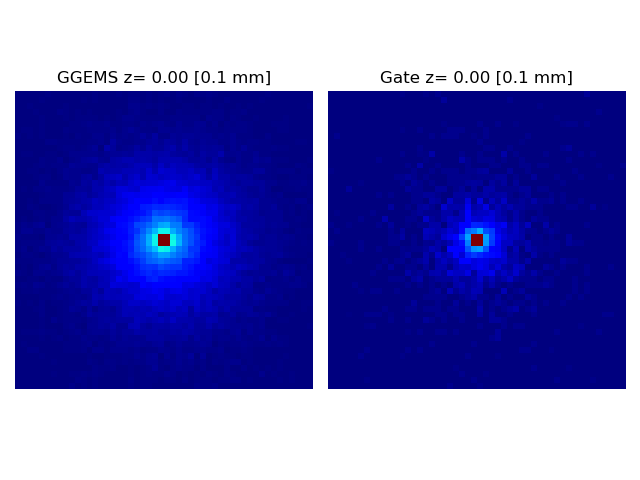

In [8]:
fig = plt.figure()
plt.subplot(121)
crop = 75

a = c = crop
b = d = -crop
log_ggems = np.log(np.flipud(ggems_image.transpose(2,1,0))[:,a:b,c:d]+1)
log_gate = np.log(ogate_image[:,a:b,c:d]+1)

ggems = np.flipud(ggems_image.transpose(2,1,0))[:,a:b,c:d]
ogate = ogate_image[:,a:b,c:d]

controls = pli.hyperslicer(log_ggems,cmap='jet',title='GGEMS z= {axis0:.2f} [0.1 mm]')
plt.axis('off')
plt.subplot(122)
pli.hyperslicer(log_gate,controls=controls,cmap='jet',title='Gate z= {axis0:.2f} [0.1 mm]')
plt.axis('off')
plt.tight_layout()

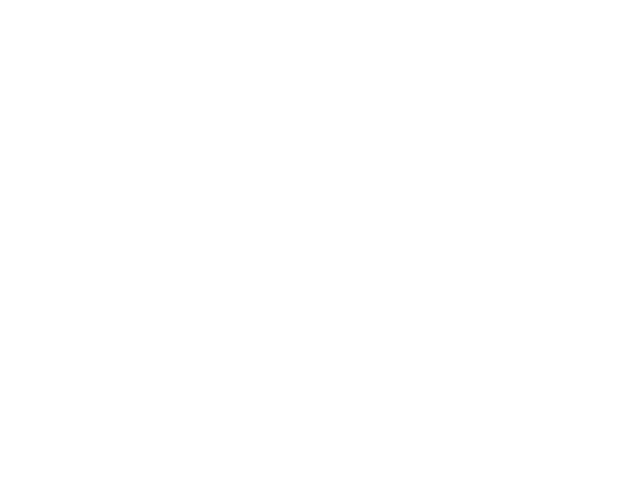

In [10]:
plt.figure()
plt.show()

### Slice midway through the phantom

<IPython.core.display.Javascript object>


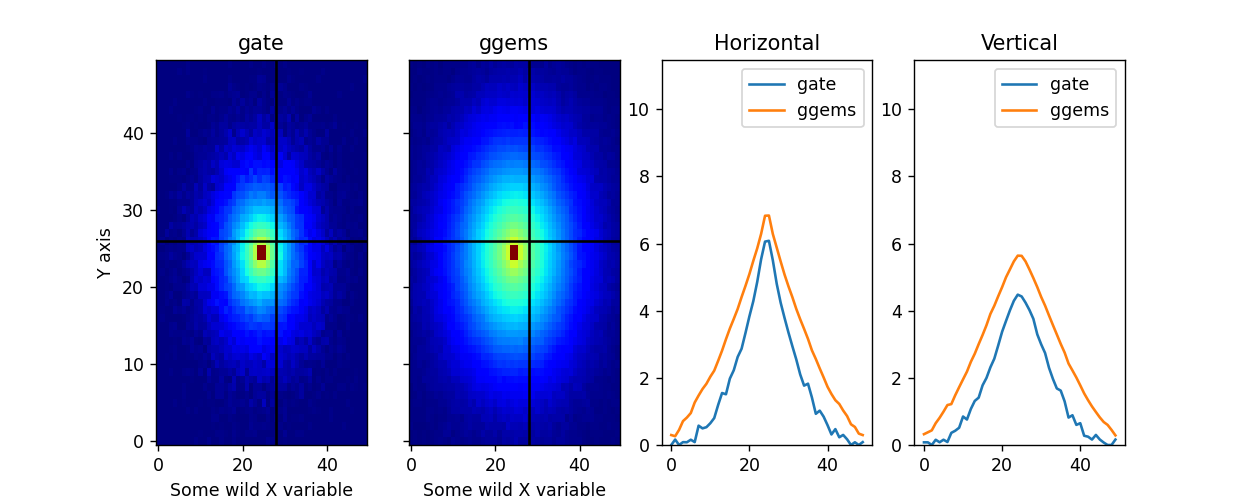

In [35]:
ind=20

fig, axes = pli.heatmap_slicer(
    np.arange(log_gate.shape[1]),
    np.arange(log_ggems.shape[1]),
    (log_gate[ind],log_ggems[ind]),
    slices="both",
    heatmap_names=("gate", "ggems"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="move",
    cmap='jet',
    figsize=[10,4]
)

<IPython.core.display.Javascript object>


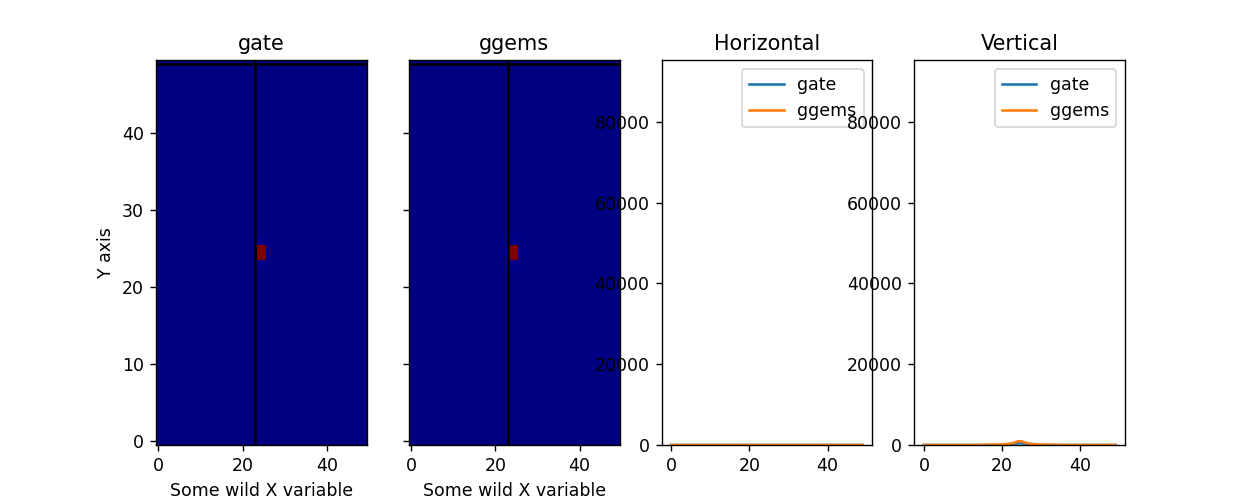

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [37]:
ind=20

fig, axes = pli.heatmap_slicer(
    np.arange(log_gate.shape[1]),
    np.arange(log_ggems.shape[1]),
    (ogate[ind],ggems[ind]),
    slices="both",
    heatmap_names=("gate", "ggems"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="move",
    cmap='jet',
    figsize=[10,4],
)
ogate_image[:,a:b,c:d]

<IPython.core.display.Javascript object>


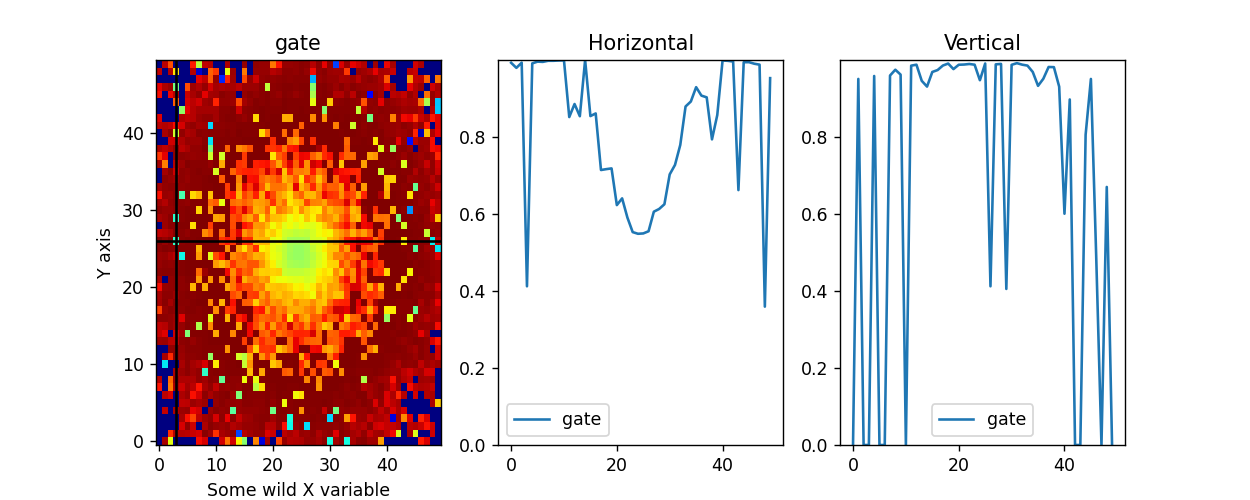

In [32]:
ind=20

fig, axes = pli.heatmap_slicer(
    np.arange(log_gate.shape[1]),
    np.arange(log_ggems.shape[1]),
    (log_ggems[ind]/(log_gate[ind]+log_ggems[ind]+0.001)),
    slices="both",
    heatmap_names=("gate", "ggems"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="move",
    cmap='jet',
    figsize=[10,4]
)

In [42]:
# save as a gif
anim = controls.save_animation("freq-plot-1.gif", fig, "axis0", interval=150)

<IPython.core.display.Javascript object>


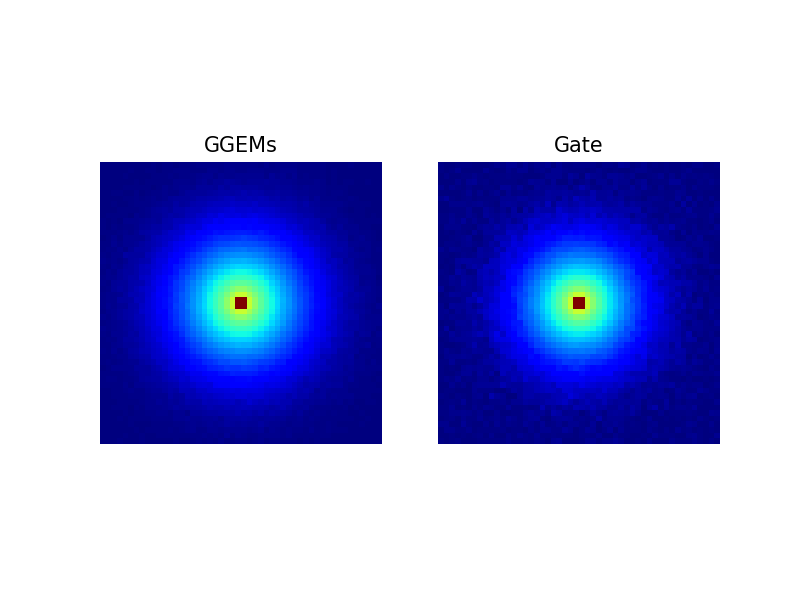

Text(0.5, 1.0, 'Gate')

In [7]:
ind = 0
crop = 75
a = c = crop
b = d = -crop
plt.figure()
plt.subplot(121)
plt.imshow(np.log(ggems_image[ind]/100+1)[a:b,c:d],cmap='jet')
plt.axis('off')
plt.title('GGEMs')
plt.subplot(122)
plt.imshow(np.log(np.sum(ogate_image,ind)[a:b,c:d]+1),cmap='jet')
plt.axis('off')
plt.title('Gate')

<IPython.core.display.Javascript object>


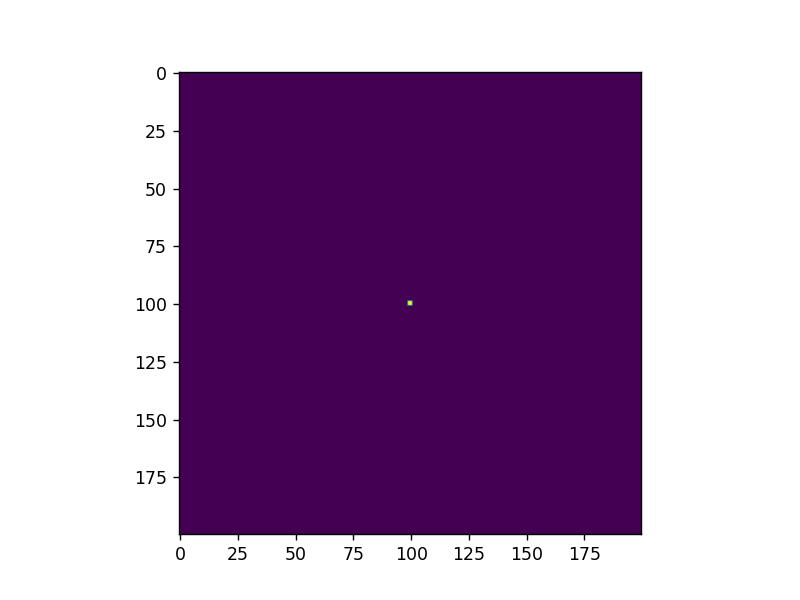

In [25]:
plt.figure()
pli.hyperslicer(ogate_image)

In [10]:
ggems_image.shape

(40, 200, 200)

In [3]:
import spekpy_mod as spm

In [23]:
import spekpy_mod.SpekConstants as Const

In [4]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt

In [9]:
s = spm.Spek.load_from_file('/home/jericho/1-Workspace/spectral_seperation_gui/25Xbeam.txt',' ')

In [10]:
s.filter('Al',1)

In [16]:
xx, yy = s.get_spectrum()
s.get_flu()

1278684411.0425637

<IPython.core.display.Javascript object>


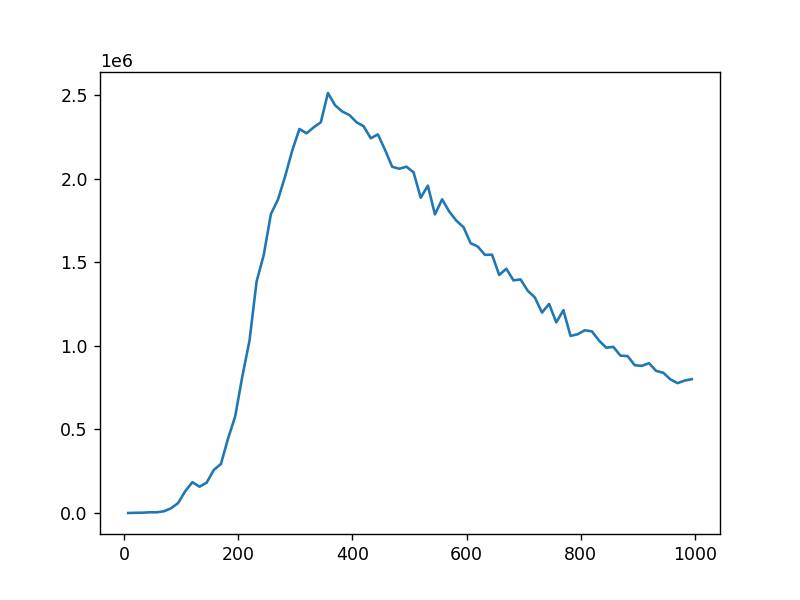

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(xx,yy)

In [11]:
xx,yy

(array([  1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,   4.75,
          5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
          9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,
         13.25,  13.75,  14.25,  14.75,  15.25,  15.75,  16.25,  16.75,
         17.25,  17.75,  18.25,  18.75,  19.25,  19.75,  20.25,  20.75,
         21.25,  21.75,  22.25,  22.75,  23.25,  23.75,  24.25,  24.75,
         25.25,  25.75,  26.25,  26.75,  27.25,  27.75,  28.25,  28.75,
         29.25,  29.75,  30.25,  30.75,  31.25,  31.75,  32.25,  32.75,
         33.25,  33.75,  34.25,  34.75,  35.25,  35.75,  36.25,  36.75,
         37.25,  37.75,  38.25,  38.75,  39.25,  39.75,  40.25,  40.75,
         41.25,  41.75,  42.25,  42.75,  43.25,  43.75,  44.25,  44.75,
         45.25,  45.75,  46.25,  46.75,  47.25,  47.75,  48.25,  48.75,
         49.25,  49.75,  50.25,  50.75,  51.25,  51.75,  52.25,  52.75,
         53.25,  53.75,  54.25,  54.75,  55.25,  55.75,  56.25, 

In [ ]:
np.trapz(),scipy.integrate.trapz()

In [10]:
import scipy.integrate as integrate

In [11]:
import scipy as sp

In [13]:
sp.interpolate.interp1d()
np.interp()

AttributeError: module 'numpy' has no attribute 'interp1d'

In [14]:
import numpy as np

def custom_interp1d(x, y):
    """
    Perform linear interpolation to create a function.

    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The corresponding y-coordinates of the data points.

    Returns:
    callable: A function that performs linear interpolation.
    """

    x = np.array(x)
    y = np.array(y)

    def interpolator(x_new):
        # Ensure x_new is a NumPy array
        x_new = np.array(x_new)

        # Find the indices of the two closest points in x
        indices = np.searchsorted(x, x_new)

        # Ensure indices stay within bounds
        indices = np.clip(indices, 1, len(x) - 1)

        # Perform linear interpolation
        x1, x2 = x[indices - 1], x[indices]
        y1, y2 = y[indices - 1], y[indices]

        # Calculate the interpolated values
        interpolated_values = y1 + (x_new - x1) * (y2 - y1) / (x2 - x1)

        return interpolated_values

    return interpolator


In [15]:
x = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [10.0, 15.0, 20.0, 25.0, 30.0]

# Create an interpolation function
interp_function = custom_interp1d(x, y)

# Test the interpolation function
x_new = [1.5, 2.5, 3.5]
result = interp_function(x_new)
print(result)

[12.5 17.5 22.5]


In [16]:
x = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [10.0, 15.0, 20.0, 25.0, 30.0]

# Create an interpolation function
interp_function = sp.interpolate.interp1d(x, y)

# Test the interpolation function
x_new = [1.5, 2.5, 3.5]
result = interp_function(x_new)
print(result)

[12.5 17.5 22.5]
